# SYNC INTERN'S

**Saleh Ashref Saleh Yasseen**

**Task 4 sign language classifier**


__________________________________________________________________________________________________________________________________________________________________________

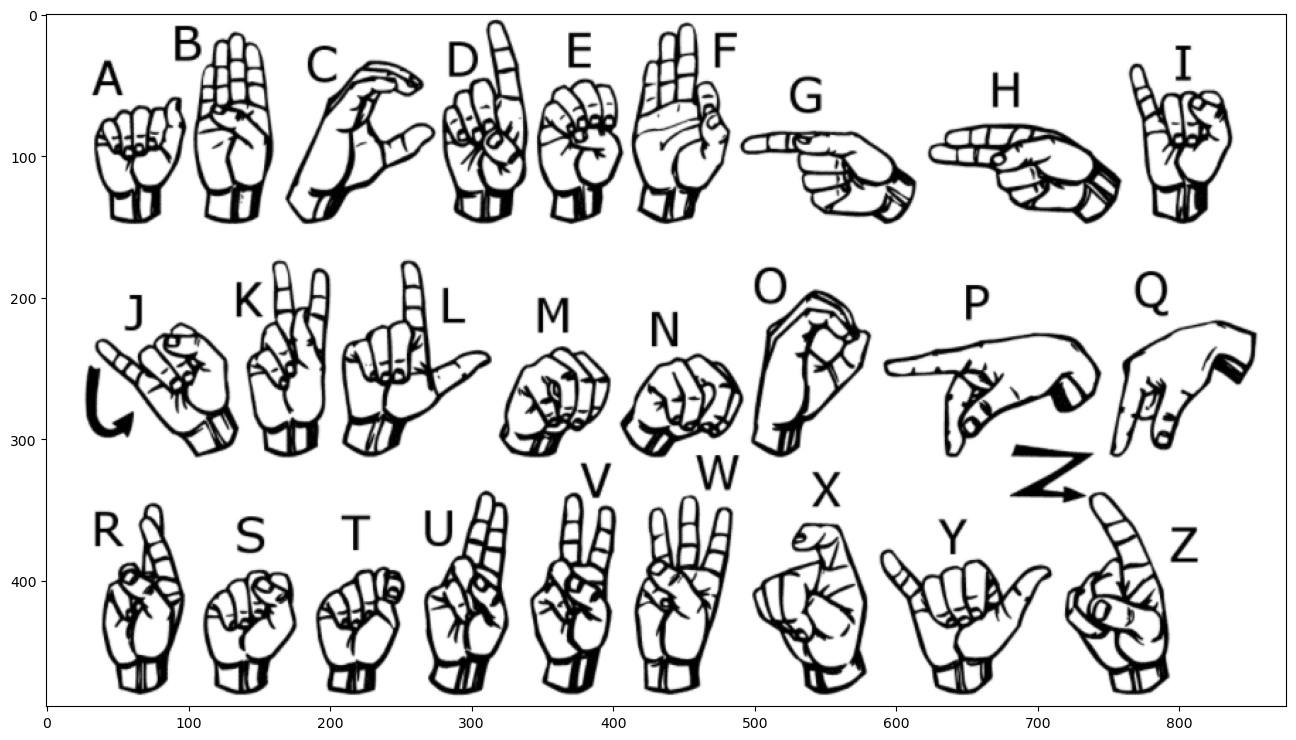

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize = (16,16))
img = plt.imread('C:\Users\saleen\Desktop\sign_language\data\american_sign_language.PNG')
plt.imshow(img)
plt.show()

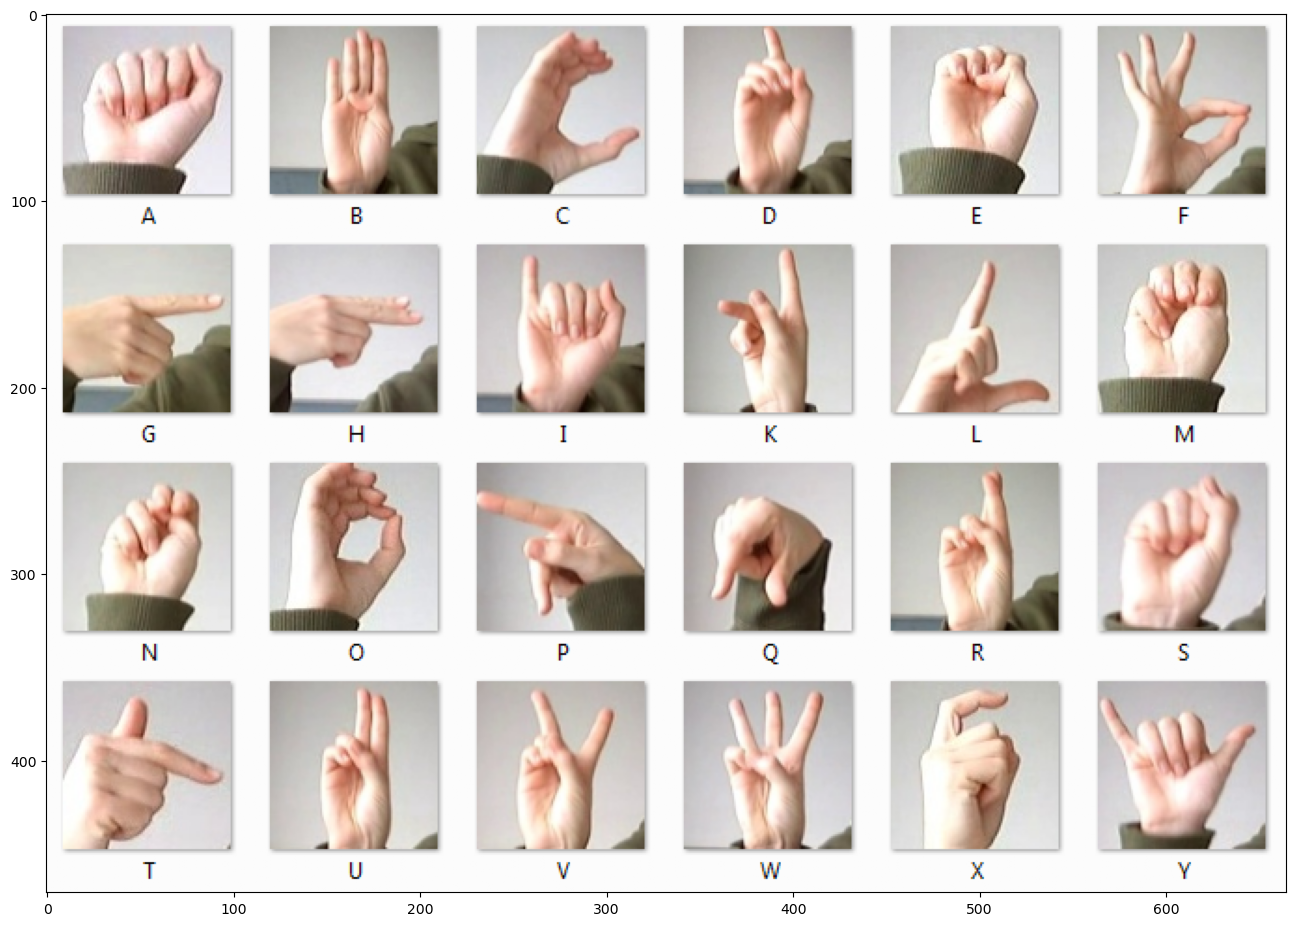

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize = (16,16))
img = plt.imread('C:\Users\saleen\Desktop\sign_language\data\amer_sign3.png')
plt.imshow(img)
plt.show()

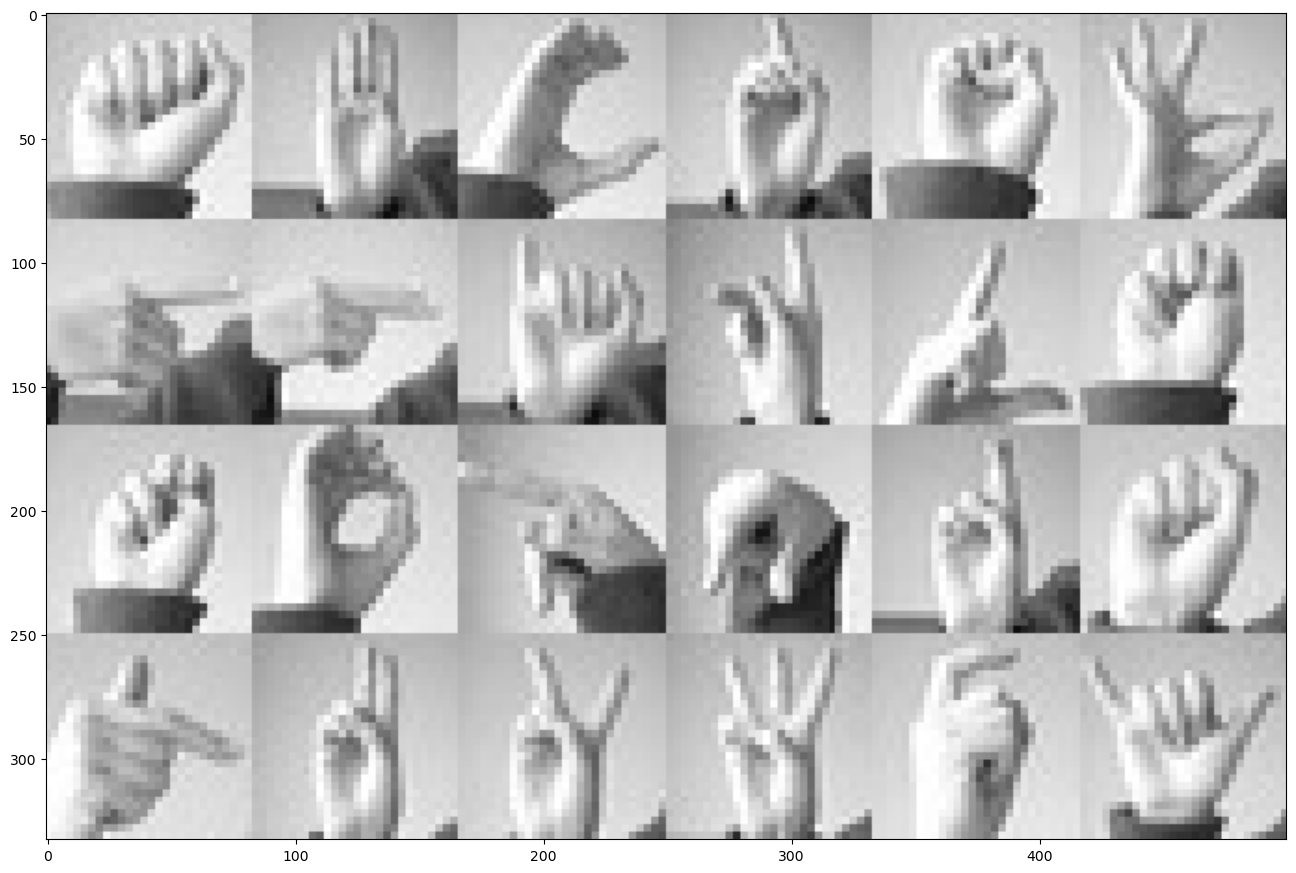

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize = (16,16))
img = plt.imread('C:\Users\saleen\Desktop\sign_language\data\amer_sign3.png')
plt.imshow(img)
plt.show()

# import data 

In [7]:

import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

# reading the data 

In [8]:
train = pd.read_csv(".data\sign_mnist_test.csv")
test = pd.read_csv("data\sign_mnist_test.csv")

In [9]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [10]:
y_train=train['label']
y_test=test['label']
X_train=train.drop(columns='label',axis=1)
X_test=test.drop(columns='label',axis=1)

# proportion of each class

Text(0.5, 1.0, 'Proportion of each class')

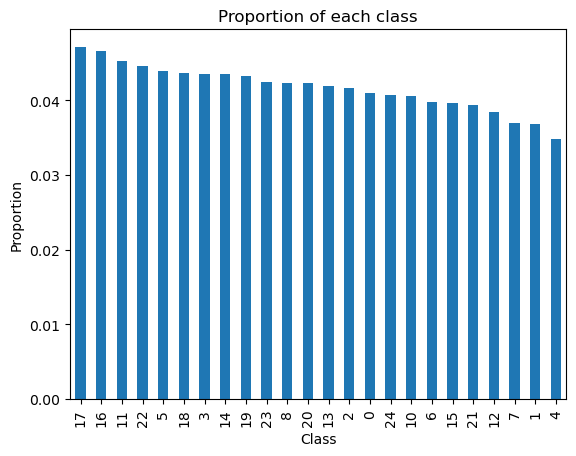

In [11]:
y_train.value_counts(normalize=True).plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Proportion')
plt.title('Proportion of each class')

# Data preprocessing

1. Normalize data will add more power for the model as it reads data in a small range  (Scale from 0 to 1 ) as it reduces the effect of illumination's differences 
2. reshape image size for 3D as input of NN 


In [12]:
X_train=X_train.values /255
X_test=X_test.values /255 

In [13]:
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

In [14]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (27455, 28, 28, 1)
X_test shape: (7172, 28, 28, 1)


In [15]:
l_bnrzer = LabelBinarizer()
y_train = l_bnrzer.fit_transform(y_train)
y_test = l_bnrzer.fit_transform(y_test)

ckeck my work 

/tmp/ipykernel_28/531425329.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


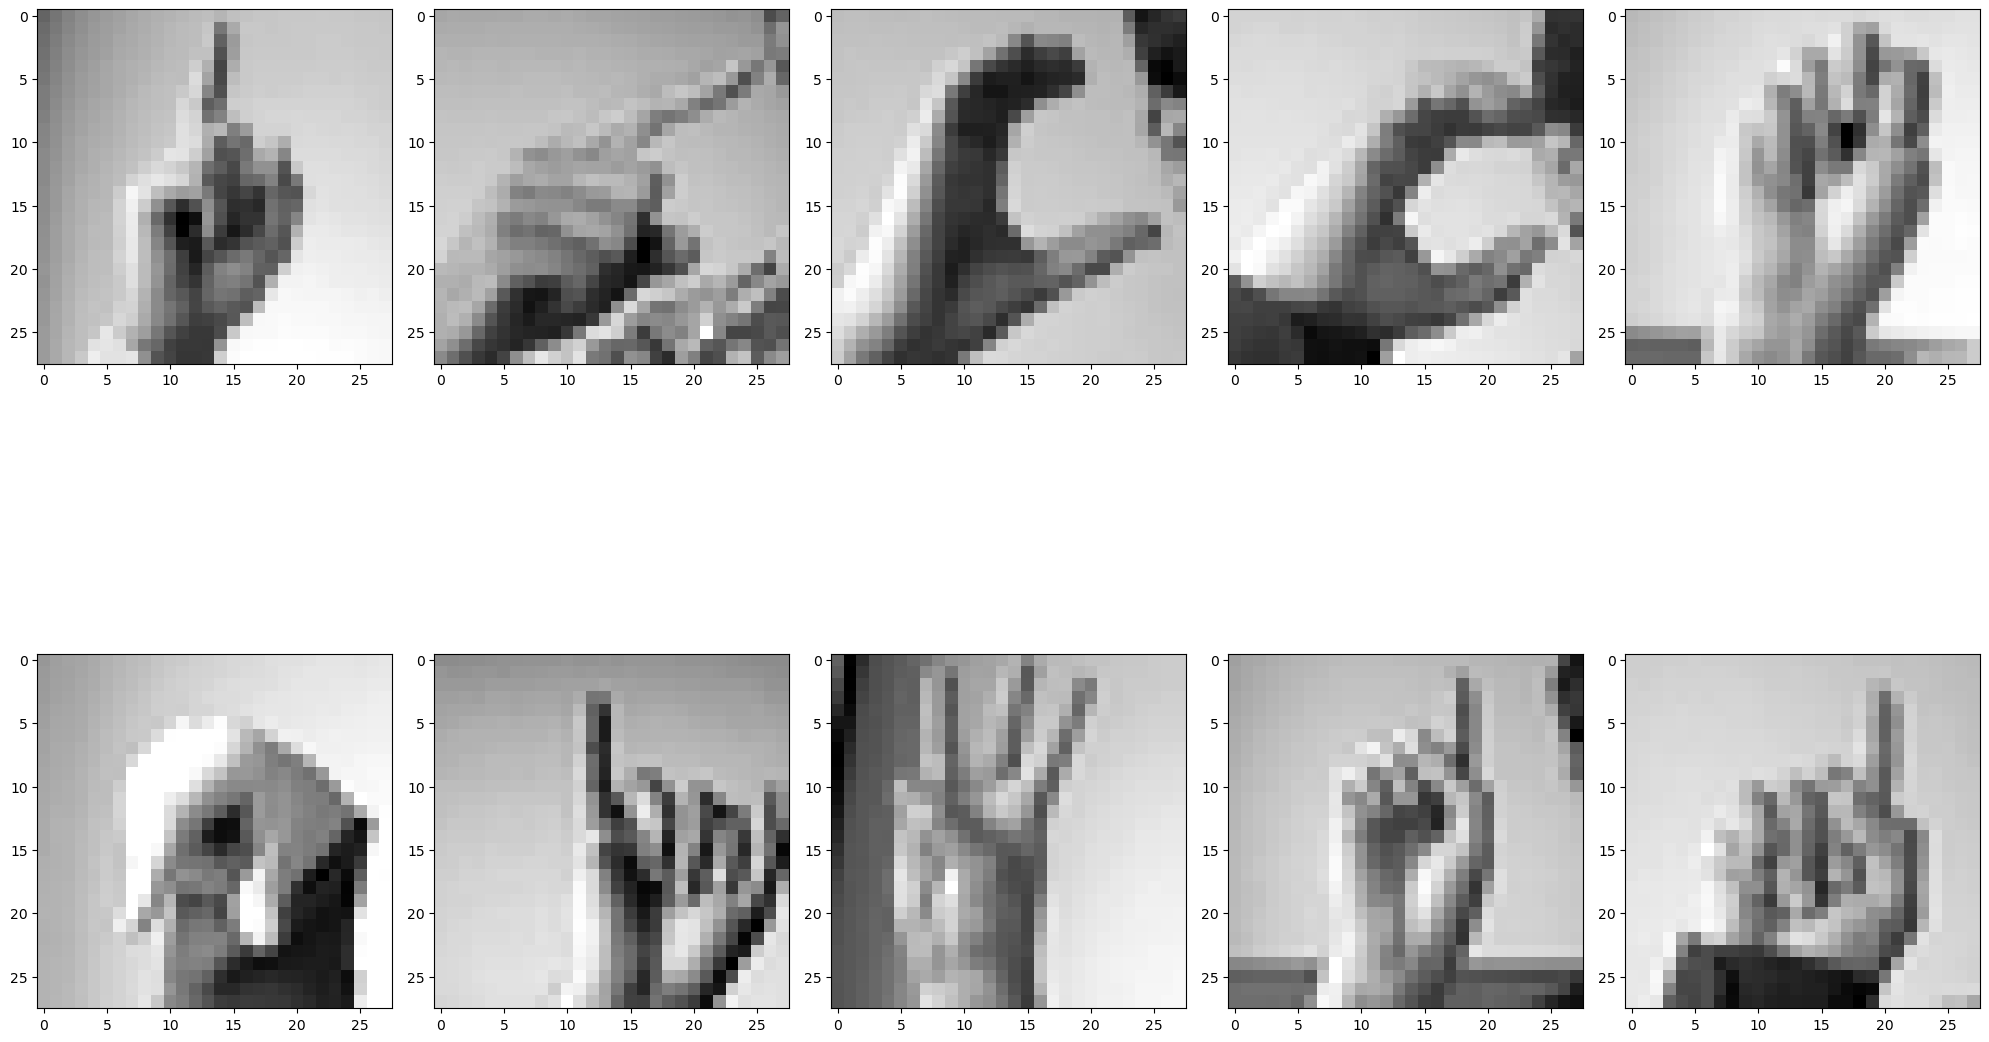

In [16]:
f, ax = plt.subplots(2,5) 
f.set_size_inches(20, 20)
k = 0
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(X_train[k].reshape(28, 28) , cmap = "gray")
        k += 1
    plt.tight_layout()   

# Data Augmentation

Keras image data generator is used for the generation of the batches containing the data of tensor images and is used in the domain of real-time data augmentation. We can loop over the data in batches when we make use of the image data generator in Keras. There are various methods and arguments of the image data generator class that helps to define the behavior of the data generation.

In [17]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

# Building the model 

In [18]:
earlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='min')
mcp_save = tf.keras.callbacks.ModelCheckpoint('/kaggle/working/model.mdl_wts.hdf5', save_best_only=True, monitor='val_loss', mode='min')
reduce_lr_loss = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.5, min_lr=0.00001)

In [19]:
model = Sequential()
model.add(Conv2D(75 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (28,28,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(50 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(25 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 512 , activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(units = 24 , activation = 'softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 75)        750       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 75)       300       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 75)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 50)        33800     
                                                                 
 dropout (Dropout)           (None, 14, 14, 50)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 14, 14, 50)       2

In [20]:
history = model.fit(datagen.flow(X_train,y_train, batch_size = 128) ,epochs = 150 , validation_data = (X_test, y_test) , callbacks = [earlyStopping, mcp_save, reduce_lr_loss])

Epoch 1/150


2023-08-15 08:06:35.087110: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


215/215 [==============================] - 28s 55ms/step - loss: 1.8675 - accuracy: 0.4089 - val_loss: 3.9841 - val_accuracy: 0.0482 - lr: 0.0010
Epoch 2/150
215/215 [==============================] - 10s 49ms/step - loss: 0.8415 - accuracy: 0.7125 - val_loss: 2.5999 - val_accuracy: 0.2811 - lr: 0.0010
Epoch 3/150
215/215 [==============================] - 11s 53ms/step - loss: 0.5258 - accuracy: 0.8211 - val_loss: 0.3440 - val_accuracy: 0.8791 - lr: 0.0010
Epoch 4/150
215/215 [==============================] - 10s 48ms/step - loss: 0.3699 - accuracy: 0.8757 - val_loss: 0.2158 - val_accuracy: 0.9289 - lr: 0.0010
Epoch 5/150
215/215 [==============================] - 10s 48ms/step - loss: 0.2941 - accuracy: 0.8975 - val_loss: 0.4365 - val_accuracy: 0.8321 - lr: 0.0010
Epoch 6/150
215/215 [==============================] - ETA: 0s - loss: 0.2362 - accuracy: 0.9191
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
215/215 [==============================] - 10s 48

# Evaluating the result

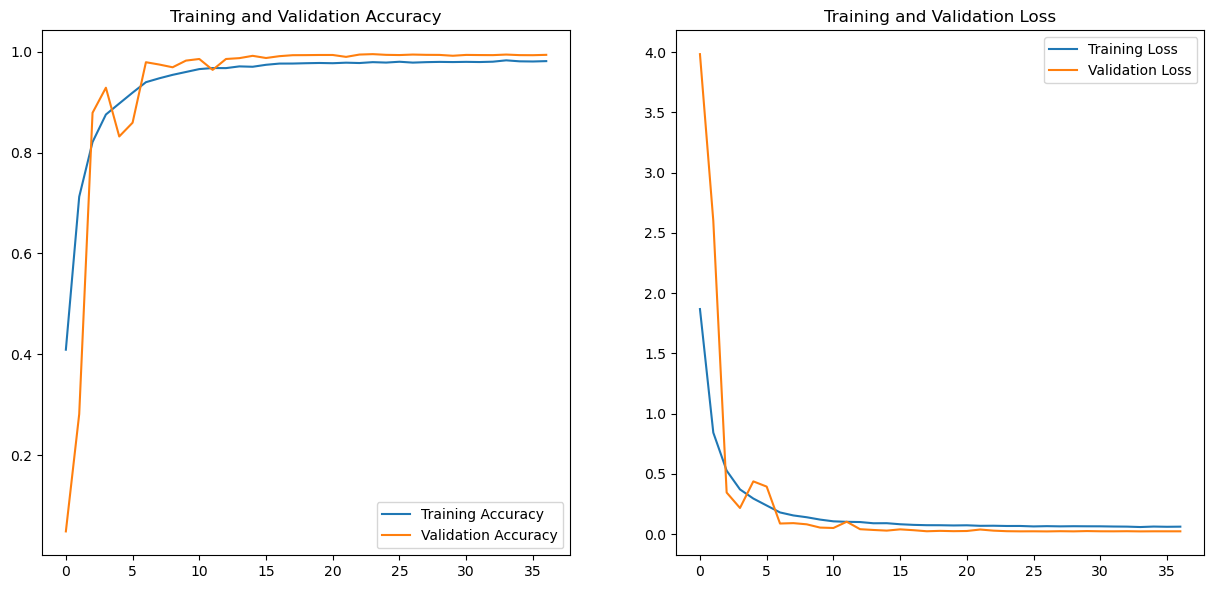

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(37)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Confusion matrix 

Confusion matrix needs both labels & predictions as single-digits, not as one-hot encoded vectors; although you have done this with your predictions using model.predict_classes(), i.e.


In [62]:
df_test = pd.read_csv('../input/sign-language-mnist/sign_mnist_test/sign_mnist_test.csv')
y_test = df_test['label']
df_test.drop(['label'], axis=1, inplace=True)
X_test = df_test.values.reshape(df_test.shape[0], 28, 28, 1)

In [63]:
y_pred = np.argmax(model.predict(X_test),axis = 1) 
y_pred=predictions.reshape(1,-1)[0]

225/225 [==============================] - 1s 3ms/step


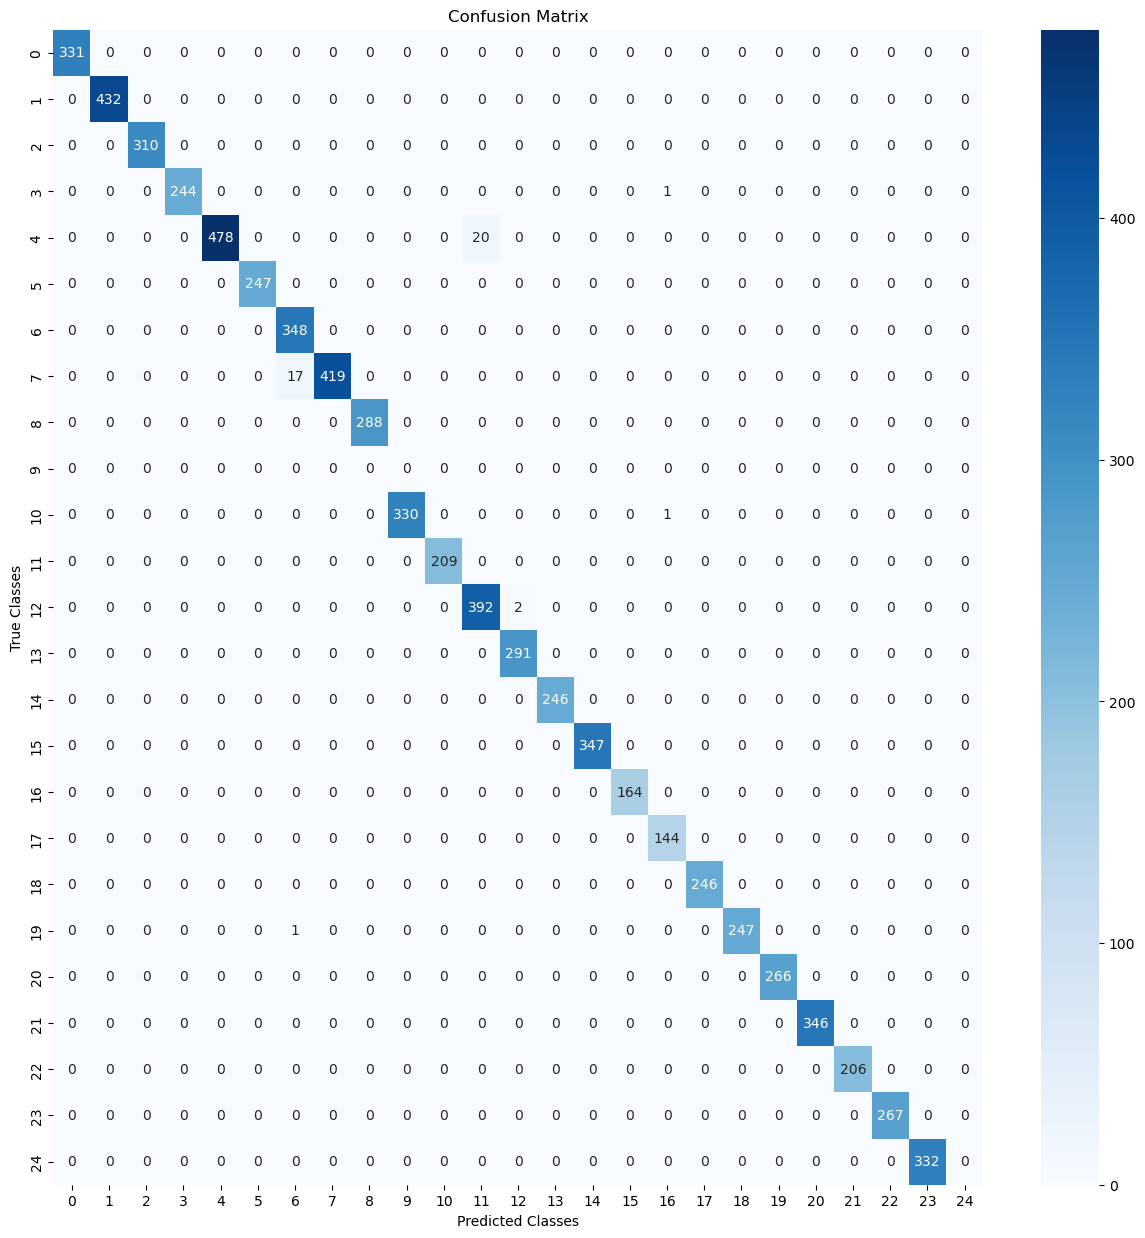

In [64]:
CM = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (15,15))
sns.heatmap(CM, annot=True, cmap="Blues", fmt = 'g')
plt.xlabel("Predicted Classes")
plt.ylabel("True Classes")
plt.title("Confusion Matrix")
plt.show()

# predictions test

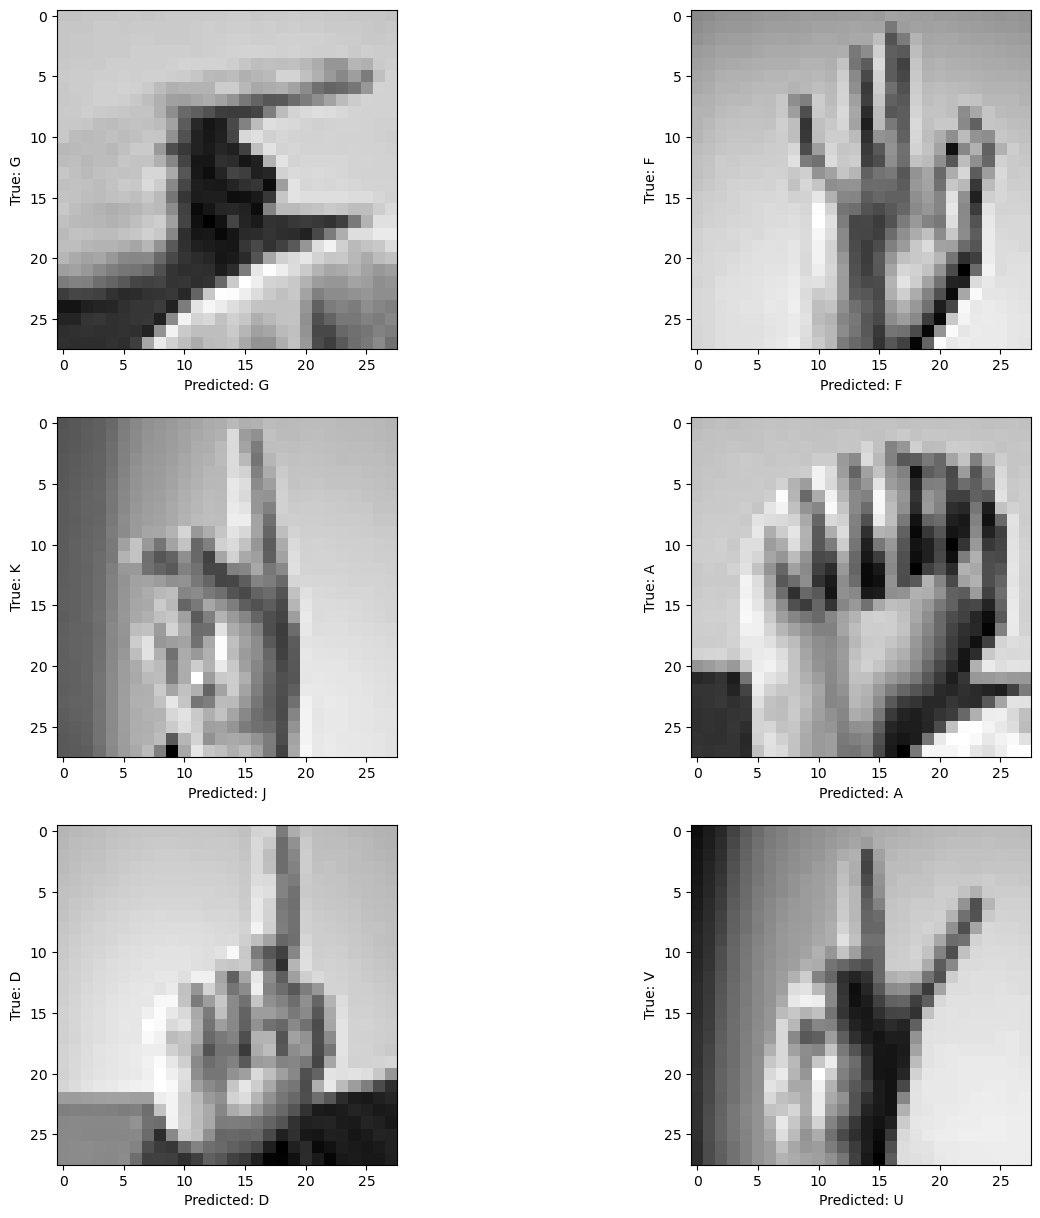

In [66]:
alphabet = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
plt.figure(figsize=(15,15))
for i in range(6):
    plt.subplot(3,2,i+1)
    plt.imshow(X_test[i],cmap='gray')
    plt.ylabel(f"True: {alphabet[y_test[i]]}")
    plt.xlabel(f"Predicted: {alphabet[y_pred[i]]}")